## Project 4 Random Forest trial

- Opt for using last 5 years - start small and then branch out if time permitting
- Columns to drop:
    - TREND
    - Avg Age Years and Schooling
    - Trend Value
    - NMSCI
    - GAIN
    - GAIN CI
    - Non-Attempt
    - NonStated
    - Withdrawn
    - NOD NMS Base (last 3 columns are stupid!)
    - Band grading 1 - 6. Certain grades have different bands - based on the score.  Score by percentage.
        - can put in presentation the different band types and %'s
    - 5220 score for Percentils values are Spelling, Parental Education and Parental Occupation subgroups BLANK DATA. = WHY? National.... RACH to look further into this one.

In [2]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline


## Loading and Preprocessing Loans Encoded Data

In [3]:
# Loading data
df_Naplan = pd.read_csv("Naplan_results.csv")
df_Naplan.head()

,CALENDAR_YEAR,YEAR_LEVEL,DOMAIN,STATE,SUBGROUP,ENROLLED_STUDENTS,MEAN,MEAN_CI,MEAN_SD,NMS,...,PCTL05,PCTL20,PCTL80,PCTL95,TREND,TREND_VALUE,NOD_MEAN_PREV,NOD_NMS_PREV,NOD_MEAN_BASE,NOD_NMS_BASE
0,2008,3,Grammar and Punctuation,ACT,Parental Education: Bachelor,167,445.2,NaN,79.7,95.8,...,308.7,381.3,513.0,565.4,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,3,Grammar and Punctuation,ACT,Parental Education: Certificate,72,396.1,NaN,91.0,90.0,...,240.9,319.4,476.6,546.1,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,3,Grammar and Punctuation,ACT,Parental Education: Diploma,52,401.4,NaN,69.1,96.9,...,283.7,342.1,456.3,519.2,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,3,Grammar and Punctuation,ACT,Parental Education: Not stated,4009,419.8,NaN,82.7,93.7,...,278.0,351.0,489.8,551.1,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,3,Grammar and Punctuation,ACT,Non-LBOTE,3852,421.2,6.2,82.5,94.4,...,279.6,352.5,491.1,552.4,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cols= df_Naplan.columns
cols

Index(['CALENDAR_YEAR', 'YEAR_LEVEL', 'DOMAIN', 'STATE', 'SUBGROUP',
       'ENROLLED_STUDENTS', 'MEAN', 'MEAN_CI', 'MEAN_SD', 'NMS', 'NMS_CI',
       'GAIN', 'GAIN_CI', 'EXEMPT', 'ABSENT', 'ASSESSED', 'WITHDRAWN',
       'NONATTEMPT', 'PARTICIPATION_RATE', 'PARTICIPATION_NUMBER',
       'NOT_STATED', 'AVERAGE_AGE', 'YEARS_OF_SCHOOLING', 'BANDCOL1',
       'BANDCOL2', 'BANDCOL3', 'BANDCOL4', 'BANDCOL5', 'BANDCOL6', 'PCTL05',
       'PCTL20', 'PCTL80', 'PCTL95', 'TREND', 'TREND_VALUE', 'NOD_MEAN_PREV',
       'NOD_NMS_PREV', 'NOD_MEAN_BASE', 'NOD_NMS_BASE'],
      dtype='object')

In [5]:
col_drop= ['NONATTEMPT','DOMAIN', 'NMS_CI', 'MEAN_SD', 'MEAN_CI','EXEMPT', 'ABSENT','NOT_STATED','AVERAGE_AGE', 'YEARS_OF_SCHOOLING','TREND', 'TREND_VALUE','WITHDRAWN','NOD_MEAN_PREV','NOD_NMS_PREV', 'NOD_MEAN_BASE', 'NOD_NMS_BASE',"GAIN","GAIN_CI",'PCTL05',
       'PCTL20', 'PCTL80', 'PCTL95']

In [6]:
df_Naplan.drop(columns=col_drop, axis=1, inplace=True)

In [7]:
filtered_df = df_Naplan[df_Naplan['YEAR_LEVEL'] > 3]
filtered_df = df_Naplan[df_Naplan["STATE"] != "AUS"]

filtered_df

,CALENDAR_YEAR,YEAR_LEVEL,STATE,SUBGROUP,ENROLLED_STUDENTS,MEAN,NMS,ASSESSED,PARTICIPATION_RATE,PARTICIPATION_NUMBER,BANDCOL1,BANDCOL2,BANDCOL3,BANDCOL4,BANDCOL5,BANDCOL6
0,2008,3,ACT,Parental Education: Bachelor,167,445.2,95.8,94.6,97.0,162,1.8,5.5,9.6,20.4,23.4,37.0
1,2008,3,ACT,Parental Education: Certificate,72,396.1,90.0,93.1,94.4,68,8.6,11.9,22.8,19.7,15.3,20.3
2,2008,3,ACT,Parental Education: Diploma,52,401.4,96.9,96.2,96.2,50,3.1,10.0,20.8,29.6,24.2,12.3
3,2008,3,ACT,Parental Education: Not stated,4009,419.8,93.7,93.5,95.7,3836,4.1,8.3,14.6,23.4,23.5,23.9
4,2008,3,ACT,Non-LBOTE,3852,421.2,94.4,94.0,95.7,3687,3.9,8.2,14.6,23.3,23.7,24.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49170,2022,9,WA,Outer regional,2623,538.7,78.0,84.2,85.7,2249,20.8,22.4,24.3,19.8,8.7,2.9
49171,2022,9,WA,Remote,1073,523.8,71.7,78.0,79.0,848,27.4,22.0,24.0,16.9,7.5,1.3
49172,2022,9,WA,Very remote,619,455.2,41.8,58.3,60.1,372,57.6,18.1,14.0,7.0,2.0,0.6
49173,2022,9,WA,Parental Education: Year 11,2933,503.1,64.8,77.3,79.9,2344,33.6,27.0,22.4,11.0,3.7,0.7


In [8]:
#filtered_df.isna().sum()
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49175 entries, 0 to 49174
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CALENDAR_YEAR         49175 non-null  int64  
 1   YEAR_LEVEL            49175 non-null  int64  
 2   STATE                 49175 non-null  object 
 3   SUBGROUP              49175 non-null  object 
 4   ENROLLED_STUDENTS     49175 non-null  int64  
 5   MEAN                  49175 non-null  float64
 6   NMS                   49175 non-null  float64
 7   ASSESSED              49175 non-null  float64
 8   PARTICIPATION_RATE    49175 non-null  float64
 9   PARTICIPATION_NUMBER  49175 non-null  int64  
 10  BANDCOL1              49175 non-null  float64
 11  BANDCOL2              49175 non-null  float64
 12  BANDCOL3              49175 non-null  float64
 13  BANDCOL4              49175 non-null  float64
 14  BANDCOL5              49175 non-null  float64
 15  BANDCOL6           

In [9]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(filtered_df)
cols= df_encoded.columns
cols



Index(['CALENDAR_YEAR', 'YEAR_LEVEL', 'ENROLLED_STUDENTS', 'MEAN', 'NMS',
       'ASSESSED', 'PARTICIPATION_RATE', 'PARTICIPATION_NUMBER', 'BANDCOL1',
       'BANDCOL2', 'BANDCOL3', 'BANDCOL4', 'BANDCOL5', 'BANDCOL6', 'STATE_ACT',
       'STATE_NSW', 'STATE_NT', 'STATE_QLD', 'STATE_SA', 'STATE_TAS',
       'STATE_VIC', 'STATE_WA', 'SUBGROUP_Female', 'SUBGROUP_Indigenous',
       'SUBGROUP_Indigenous Inner regional',
       'SUBGROUP_Indigenous Major cities',
       'SUBGROUP_Indigenous Outer regional', 'SUBGROUP_Indigenous Remote',
       'SUBGROUP_Indigenous Very remote', 'SUBGROUP_Inner regional',
       'SUBGROUP_LBOTE', 'SUBGROUP_Major cities', 'SUBGROUP_Male',
       'SUBGROUP_Non-Indigenous', 'SUBGROUP_Non-Indigenous Inner regional',
       'SUBGROUP_Non-Indigenous Major cities',
       'SUBGROUP_Non-Indigenous Outer regional',
       'SUBGROUP_Non-Indigenous Remote', 'SUBGROUP_Non-Indigenous Very remote',
       'SUBGROUP_Non-LBOTE', 'SUBGROUP_Outer regional',
       'SUBGROUP_P

## BREAKDOWN OF DATA INTO SMALLER DATA SETS FOR TESTING

In [10]:
selected_columns_1 = ['CALENDAR_YEAR', 'YEAR_LEVEL', 'ENROLLED_STUDENTS', 'NMS', 'PARTICIPATION_RATE']
smaller_df = df_encoded[selected_columns_1]

In [11]:
selected_columns_2 = [ 'NMS','PARTICIPATION_RATE',"SUBGROUP_Parental Occupation: Group 1","SUBGROUP_Parental Occupation: Group 2",
	"SUBGROUP_Parental Occupation: Group 3",	"SUBGROUP_Parental Occupation: Group 4","SUBGROUP_Parental Occupation: Not in paid work"]
Sub_df = df_encoded[selected_columns_2]

In [12]:
selected_columns_3 = [ 'NMS', 'SUBGROUP_Female', 'SUBGROUP_Male']
gender_df = df_encoded[selected_columns_3]

In [13]:
selected_columns_4 = [ 'NMS',  'SUBGROUP_Indigenous', 'SUBGROUP_Indigenous Inner regional',
       'SUBGROUP_Indigenous Major cities',
       'SUBGROUP_Indigenous Outer regional', 'SUBGROUP_Indigenous Remote',
       'SUBGROUP_Indigenous Very remote', 'SUBGROUP_Inner regional', ]
indigenous_df = df_encoded[selected_columns_4]

In [14]:
selected_columns_5 = [ 'NMS',  'SUBGROUP_Non-Indigenous', 'SUBGROUP_Non-Indigenous Inner regional',
       'SUBGROUP_Non-Indigenous Major cities',
       'SUBGROUP_Non-Indigenous Outer regional',
       'SUBGROUP_Non-Indigenous Remote', 'SUBGROUP_Non-Indigenous Very remote']
nonindigenous_df = df_encoded[selected_columns_5]

##  LINEAR REGRESSION MODEL 

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Load and prepare data
y = Sub_df['PARTICIPATION_RATE']
X = Sub_df.drop(columns=['PARTICIPATION_RATE'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 27.25765718157745
R-squared: 0.5591897174868852


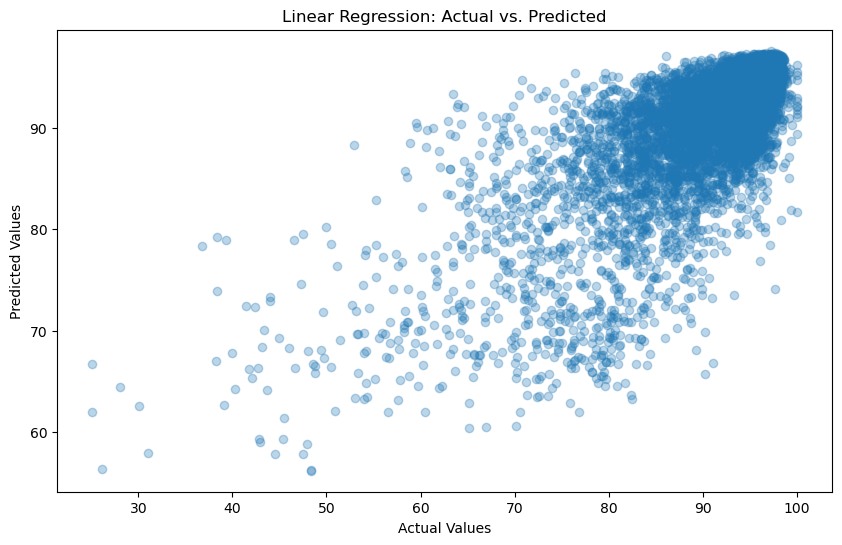

In [16]:
# Visualize the Linear Regression results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.title("Linear Regression: Actual vs. Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

## SEARBORN HEAT MAPS

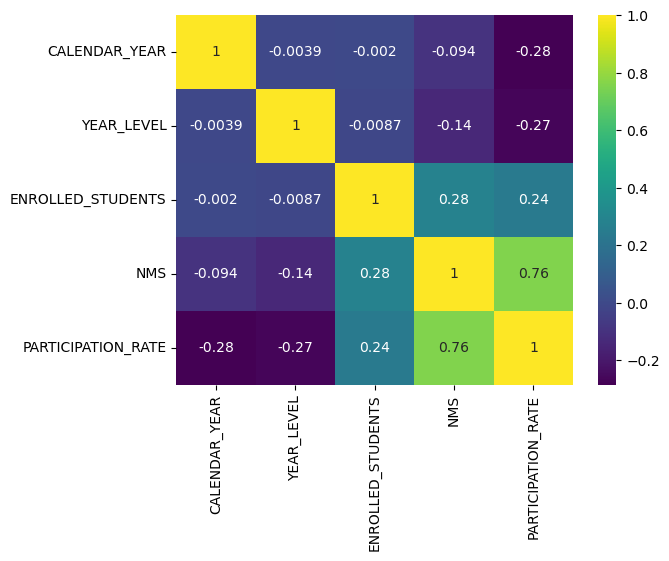

In [17]:
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
corrMatrix=smaller_df.corr()
sns.heatmap(corrMatrix, annot=True, cmap ="viridis") 
plt.show()

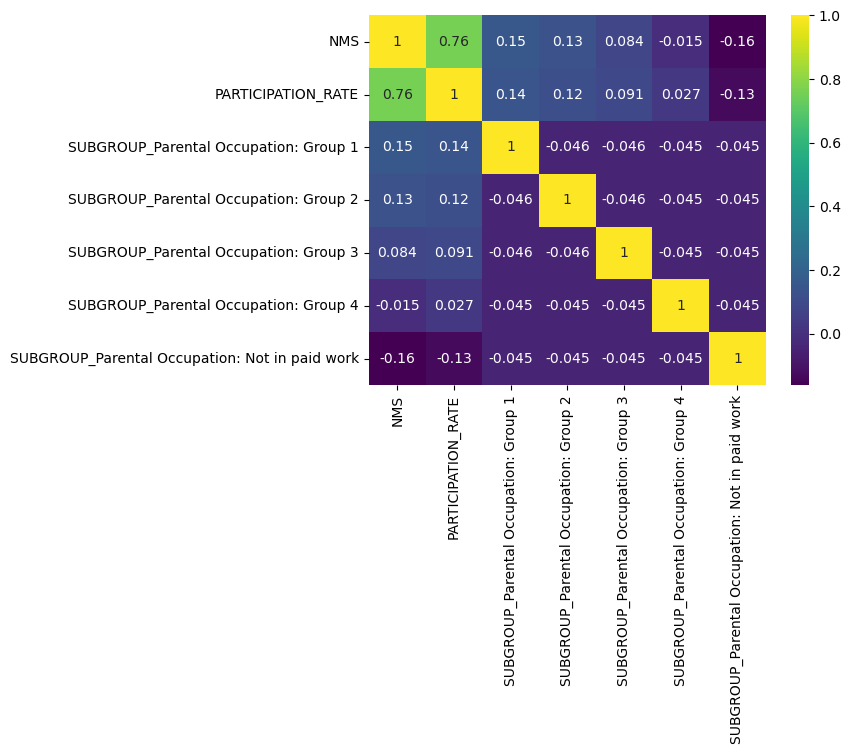

In [18]:
corrMatrix=Sub_df.corr()
sns.heatmap(corrMatrix, annot=True, cmap ="viridis") 
plt.show()

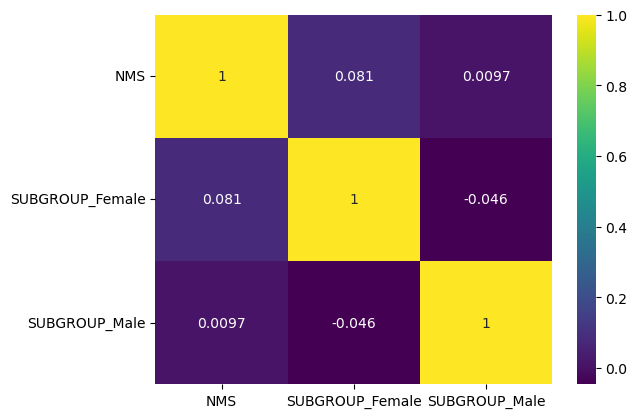

In [19]:
corrMatrix=gender_df.corr()
sns.heatmap(corrMatrix, annot=True, cmap ="viridis") 
plt.show()

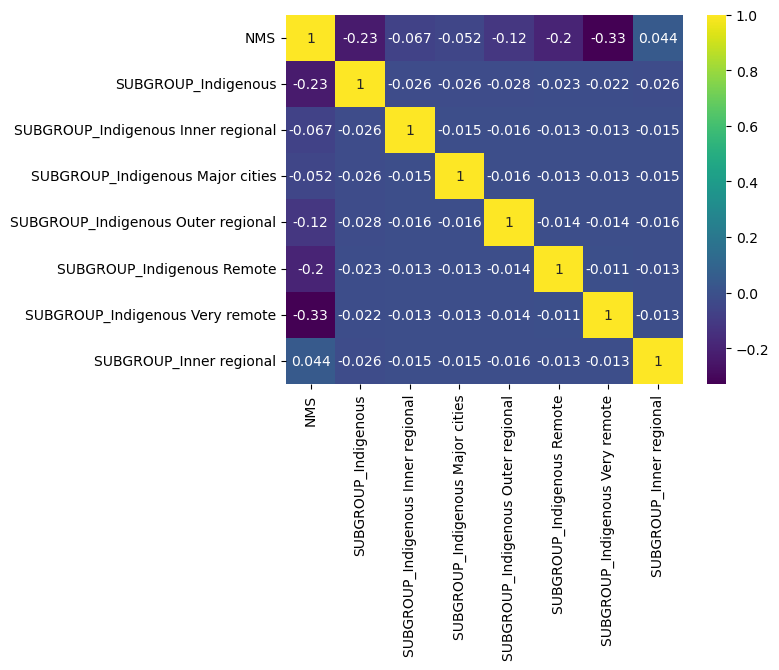

In [20]:
corrMatrix=indigenous_df.corr()
sns.heatmap(corrMatrix, annot=True, cmap ="viridis") 
plt.show()

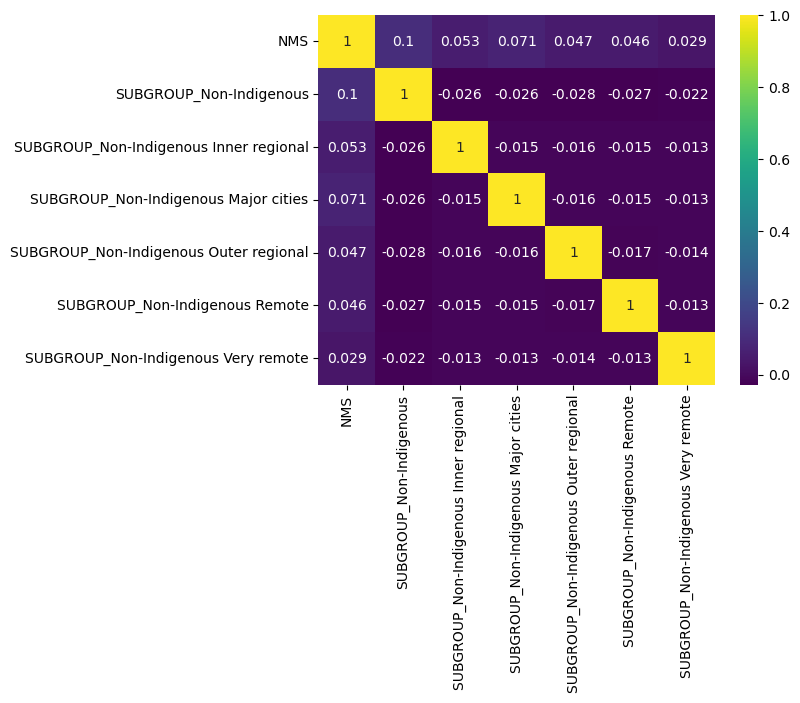

In [21]:
corrMatrix=nonindigenous_df.corr()
sns.heatmap(corrMatrix, annot=True, cmap ="viridis") 
plt.show()

##  LINEAR REGRESSION ON NMS 

In [22]:
# Load and prepare data
y = smaller_df['NMS']
X = smaller_df.drop(columns=['NMS'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 81.04811822131775
R-squared: 0.5885152509158758


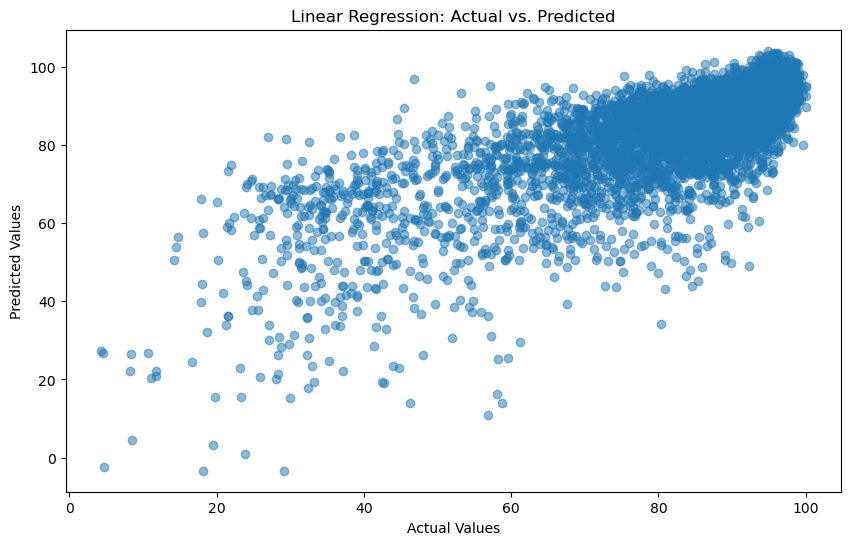

In [23]:
# Visualize the Linear Regression results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Linear Regression: Actual vs. Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

##Indigenous data set

In [24]:
# Load and prepare data
y = indigenous_df['NMS']
X = indigenous_df.drop(columns=['NMS'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 150.26200579486235
R-squared: 0.23711339500152473


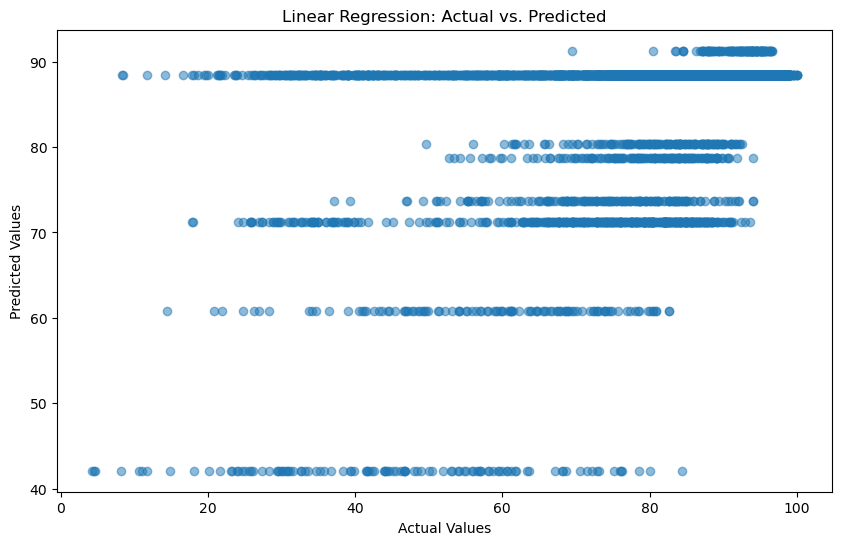

In [25]:
# Visualize the Linear Regression results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Linear Regression: Actual vs. Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

##Non Indigenous Data set

In [26]:
# Load and prepare data
y = nonindigenous_df['NMS']
X = nonindigenous_df.drop(columns=['NMS'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 192.0423124073538
R-squared: 0.024992998373032815


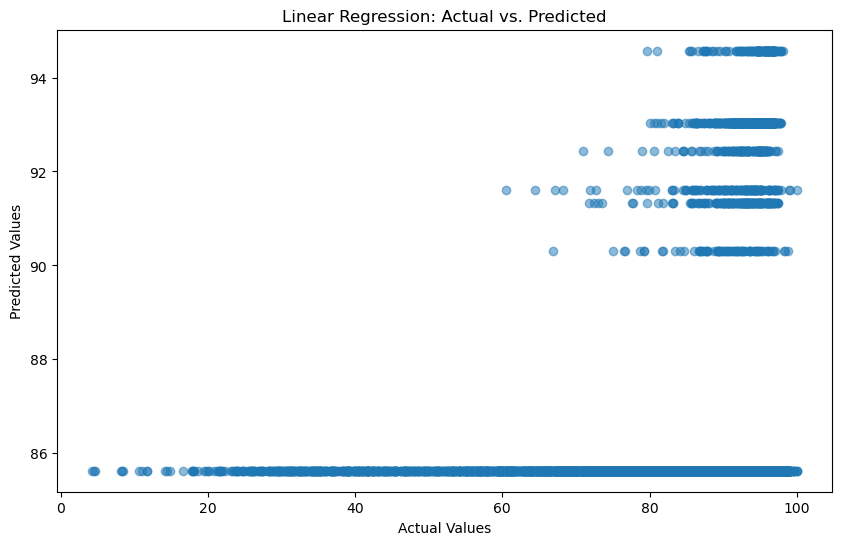

In [27]:
# Visualize the Linear Regression results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Linear Regression: Actual vs. Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

## TRYING DBSCAN ON DATA 

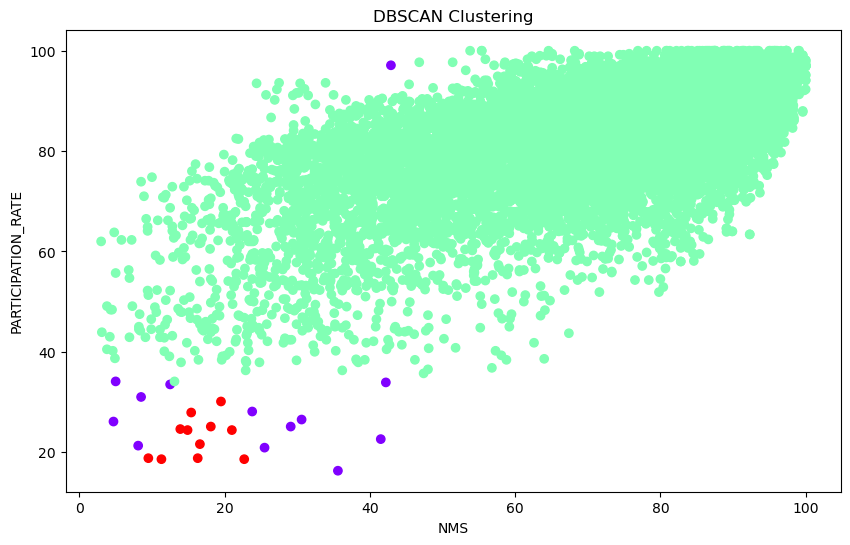

In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


# Choose the columns you want to use for clustering (adjust as needed)
selected_columns = ["NMS","PARTICIPATION_RATE"]

# Preprocess the data (standardize features)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded[selected_columns])

# Create and fit the DBSCAN model
eps = 0.5  # Adjust the neighborhood distance
min_samples = 5  # Adjust the minimum number of samples in a neighborhood
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(scaled_features)

# Add the cluster labels to the original DataFrame
df_encoded['Cluster'] = clusters

# Visualize the clusters (for 2D data)
if len(selected_columns) == 2:
    plt.figure(figsize=(10, 6))
    plt.scatter(df_encoded[selected_columns[0]], df_encoded[selected_columns[1]], c=df_encoded['Cluster'], cmap='rainbow')
    plt.title("DBSCAN Clustering")
    plt.xlabel(selected_columns[0])
    plt.ylabel(selected_columns[1])
    plt.show()


In [29]:
# Choose the columns you want to use for clustering (adjust as needed)
selected_columns = ["NMS","PARTICIPATION_NUMBER"]

# Preprocess the data (standardize features)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded[selected_columns])

# Create and fit the DBSCAN model
eps = 0.5  # Adjust the neighborhood distance
min_samples = 5  # Adjust the minimum number of samples in a neighborhood
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(scaled_features)

# Add the cluster labels to the original DataFrame
df_encoded['Cluster'] = clusters

# Visualize the clusters (for 2D data)
if len(selected_columns) == 2:
    plt.figure(figsize=(10, 6))
    plt.scatter(df_encoded[selected_columns[0]], df_encoded[selected_columns[1]], c=df_encoded['Cluster'], cmap='rainbow')
    plt.title("DBSCAN Clustering")
    plt.xlabel(selected_columns[0])
    plt.ylabel(selected_columns[1])
    plt.show()

KeyboardInterrupt: 

In [ ]:
# 'CALENDAR_YEAR', 'YEAR_LEVEL', 'ENROLLED_STUDENTS', 'MEAN', 'NMS',
#        'ASSESSED', 'PARTICIPATION_RATE', 'PARTICIPATION_NUMBER', 'BANDCOL1',
#        'BANDCOL2', 'BANDCOL3', 'BANDCOL4', 'BANDCOL5', 'BANDCOL6', 'STATE_ACT',
#        'STATE_NSW', 'STATE_NT', 'STATE_QLD', 'STATE_SA', 'STATE_TAS',
#        'STATE_VIC', 'STATE_WA', 'SUBGROUP_Female', 'SUBGROUP_Indigenous',
#        'SUBGROUP_Indigenous Inner regional',
#        'SUBGROUP_Indigenous Major cities',
#        'SUBGROUP_Indigenous Outer regional', 'SUBGROUP_Indigenous Remote',
#        'SUBGROUP_Indigenous Very remote', 'SUBGROUP_Inner regional',
#        'SUBGROUP_LBOTE', 'SUBGROUP_Major cities', 'SUBGROUP_Male',
#        'SUBGROUP_Non-Indigenous', 'SUBGROUP_Non-Indigenous Inner regional',
#        'SUBGROUP_Non-Indigenous Major cities',
#        'SUBGROUP_Non-Indigenous Outer regional',
#        'SUBGROUP_Non-Indigenous Remote', 'SUBGROUP_Non-Indigenous Very remote',
#        'SUBGROUP_Non-LBOTE', 'SUBGROUP_Outer regional',
#        'SUBGROUP_Parental Education: Bachelor',
#        'SUBGROUP_Parental Education: Certificate',
#        'SUBGROUP_Parental Education: Diploma',
#        'SUBGROUP_Parental Education: Not stated',
#        'SUBGROUP_Parental Education: Year 11',
#        'SUBGROUP_Parental Education: Year 12',
#        'SUBGROUP_Parental Occupation: Group 1',
#        'SUBGROUP_Parental Occupation: Group 2',
#        'SUBGROUP_Parental Occupation: Group 3',
#        'SUBGROUP_Parental Occupation: Group 4',
#        'SUBGROUP_Parental Occupation: Not in paid work',
#        'SUBGROUP_Parental Occupation: Not stated', 'SUBGROUP_Remote',
#        'SUBGROUP_Very remote'],

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_scaler = scaler.fit(X_train)

In [ ]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Fitting the Random Forest model

In [ ]:
# Create Random Forest model
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

In [ ]:
# Train the model
RFmodel= model.fit(X_train, y_train)
RFmodel

## Making Predictions Using the Random Forest Model

In [ ]:
# Making predictions using the testing data
predictions = RFmodel.predict(X_test_scaled)

## Model Evaluation

In [ ]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [ ]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

## Feature Importance

In [ ]:
# Random Forests in sklearn will automatically calculate feature importance
importances = RFmodel.feature_importances_
# We can sort the features by their importance
sorted(zip(RFmodel.feature_importances_, X.columns), reverse=False)

In [ ]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(RFmodel.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='blue', title= 'Features Importances', legend=False)